## Question 2

In [1]:
import pandas as pd

df = pd.read_csv('nndb_flat.csv')

df


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


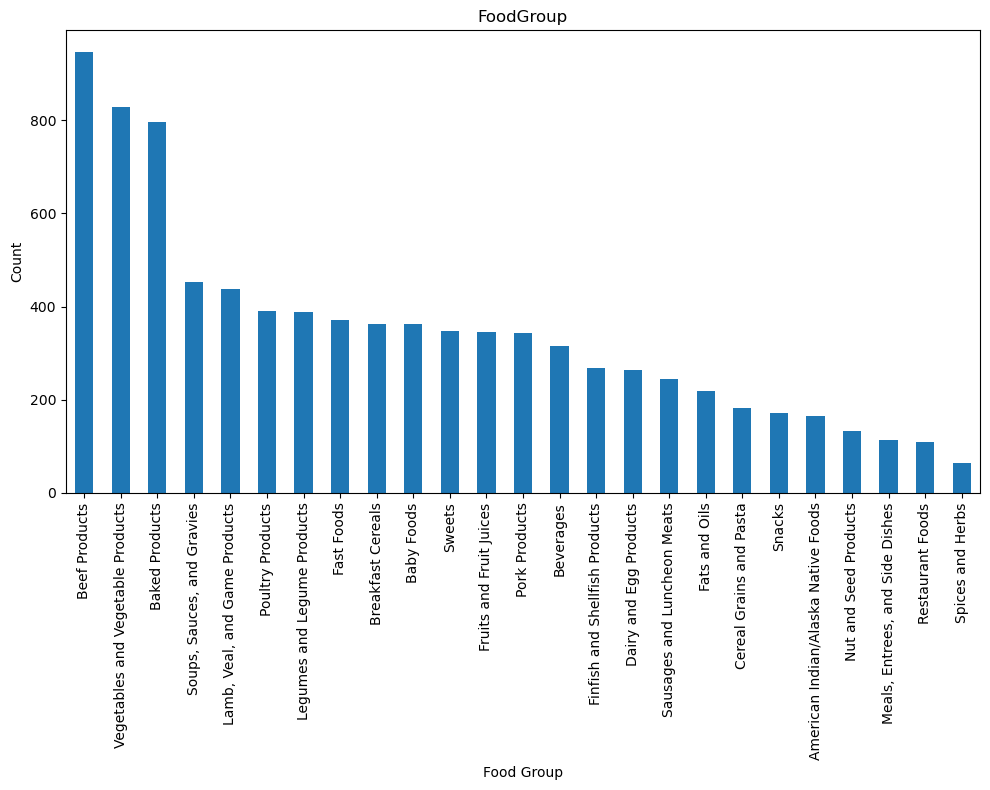

In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
df['FoodGroup'].value_counts().plot(kind='bar')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.title('FoodGroup')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df['target'] = df['FoodGroup'].astype('category').cat.codes
features= df.columns.tolist()
X = features[7:]
# Pairs plot
sns.pairplot(df[X], hue='target')
plt.show()


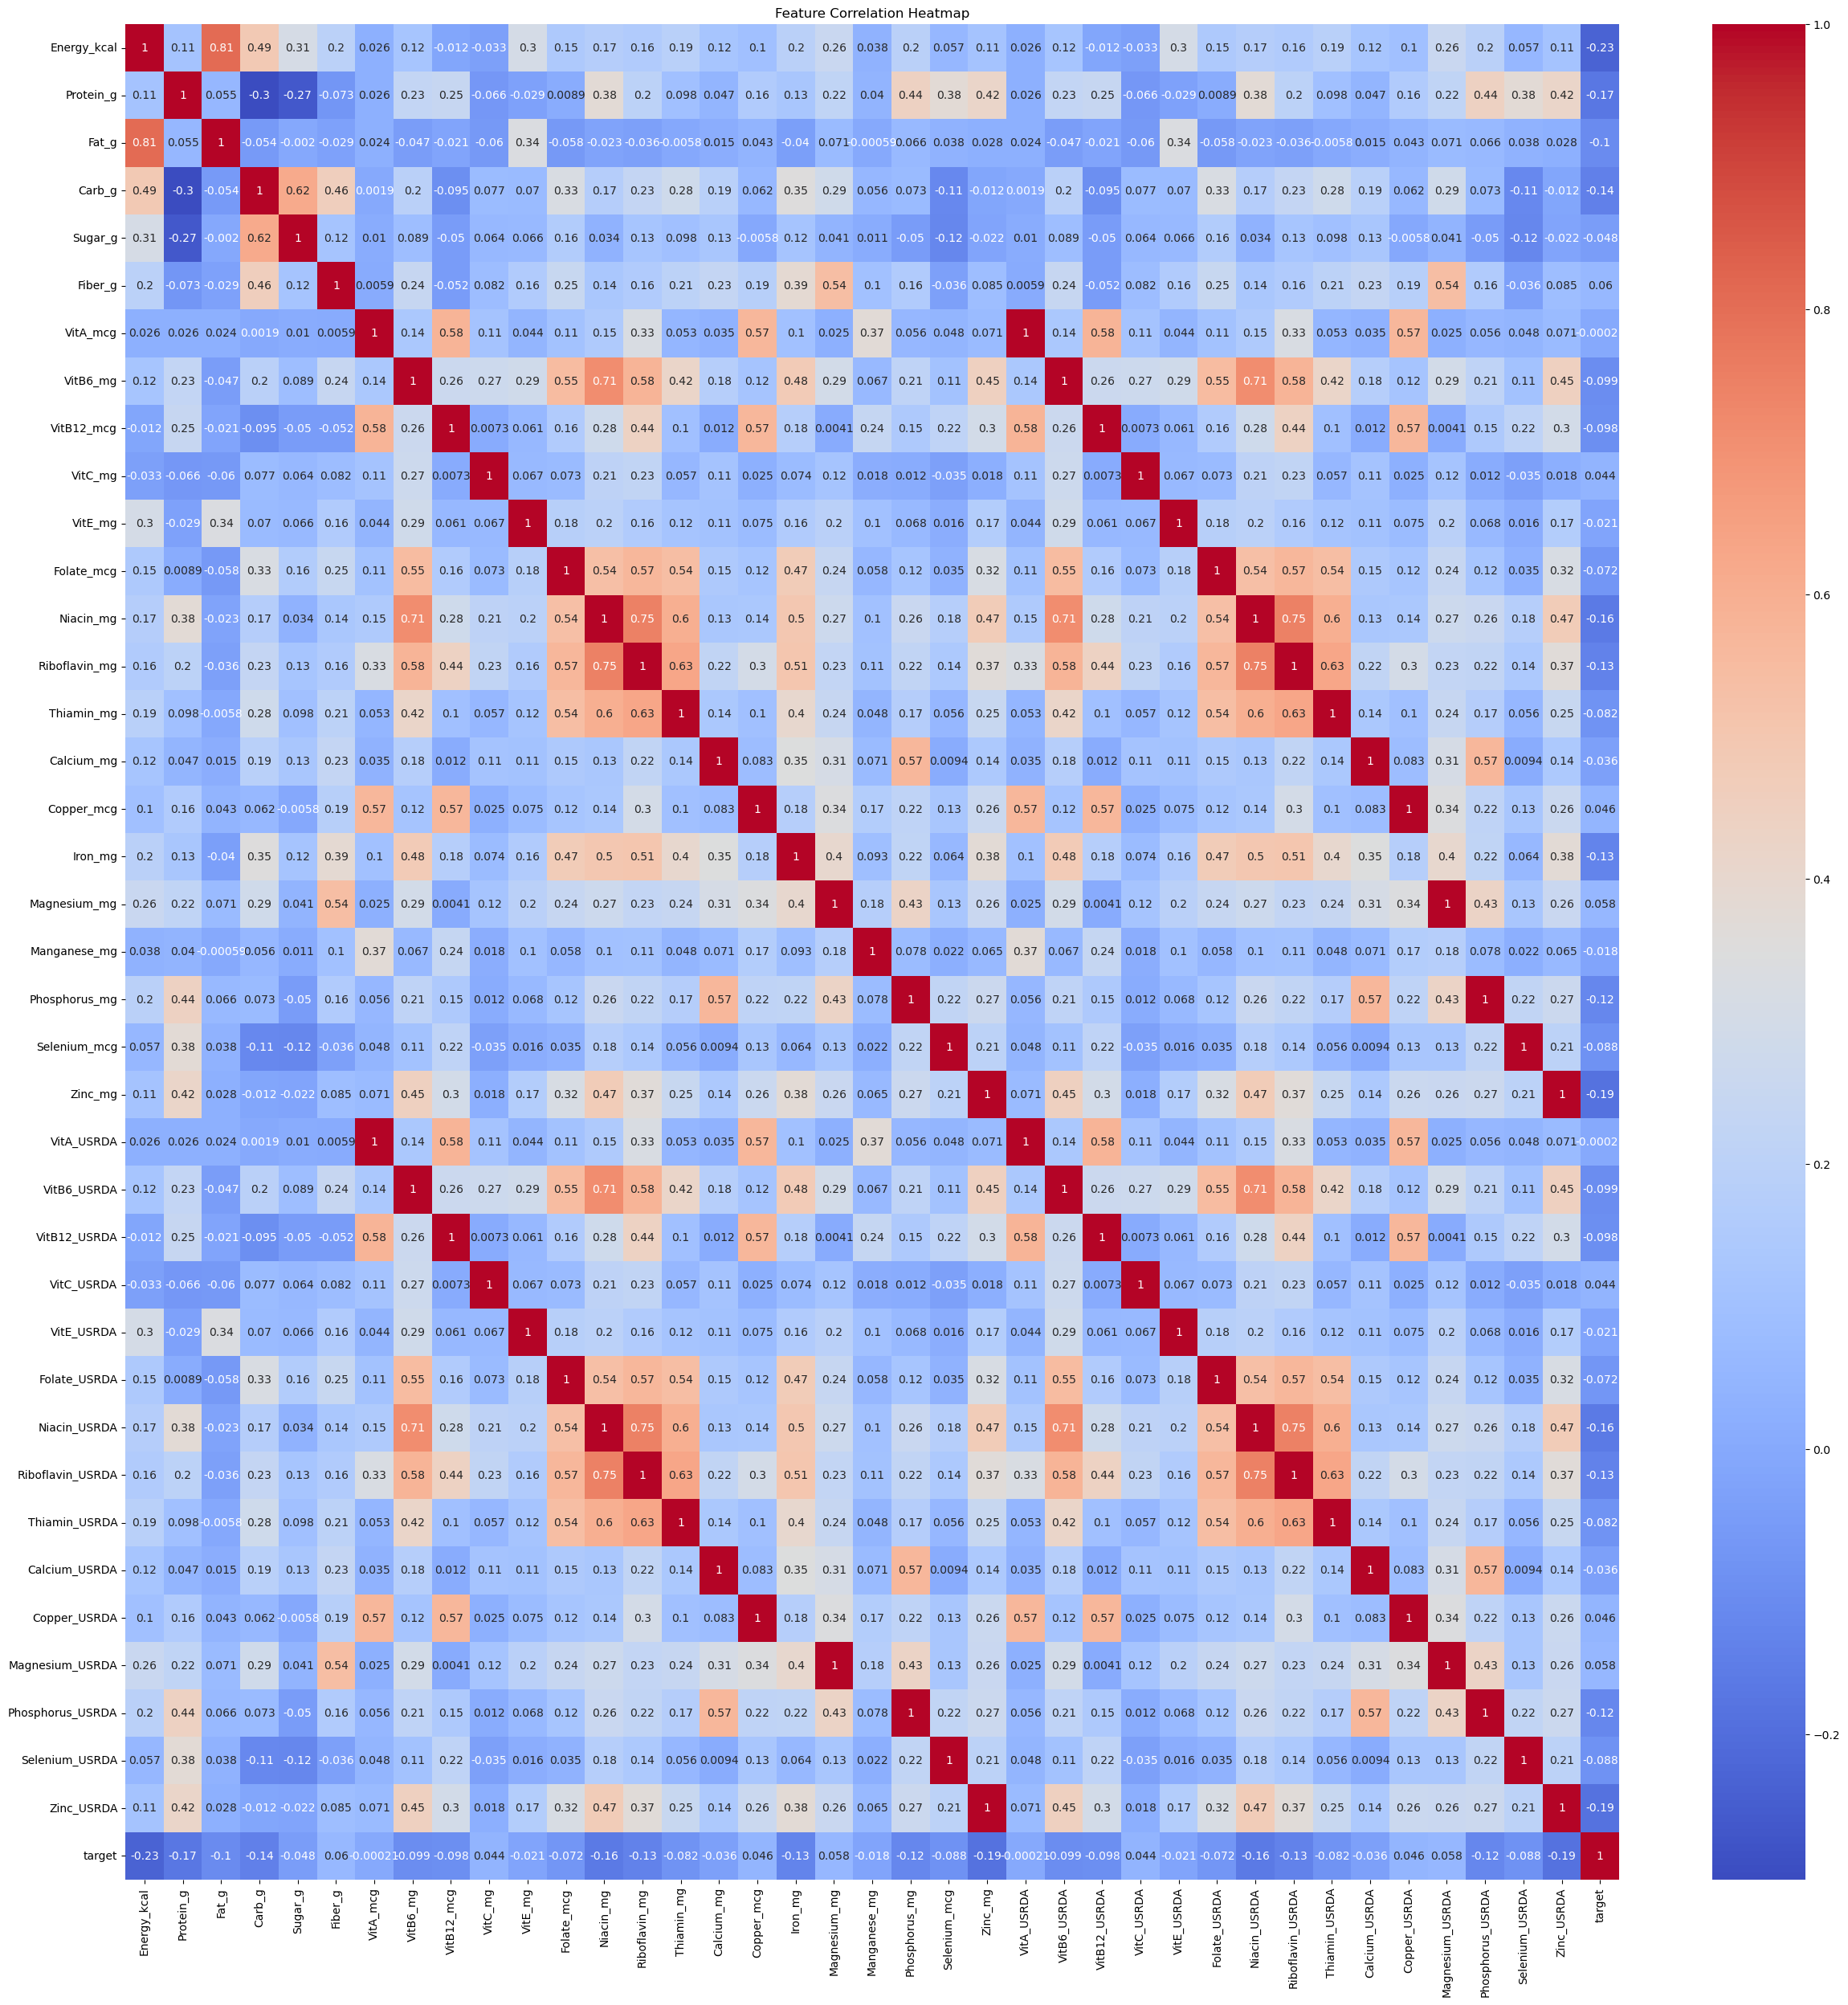

In [4]:
import seaborn as sns
df['target'] = df['FoodGroup'].astype('category').cat.codes
features= df.columns.tolist()
X = features[7:]


plt.figure(figsize=(30,30))
sns.heatmap(df[X].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## EDA

In [5]:
df.shape

(8618, 46)

In [6]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA', 'target'],
      dtype='object')

In [7]:

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df) * 100).round(2)

print("Missing value counts per column:\n")
print(missing_counts)


Missing value counts per column:

ScientificName      7886
CommonName          7555
MfgName             7058
ID                     0
Folate_USRDA           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Riboflavin_USRDA       0
Niacin_USRDA           0
Magnesium_mg           0
Thiamin_USRDA          0
Calcium_USRDA          0
Copper_USRDA           0
Magnesium_USRDA        0
Phosphorus_USRDA       0
Selenium_USRDA         0
Zinc_USRDA             0
Manganese_mg           0
Copper_mcg             0
Iron_mg                0
VitA_mcg               0
ShortDescrip           0
Descrip                0
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitB6_mg               0
FoodGroup              0
VitB12_mcg             0
VitC_mg         

In [8]:
foodgroup_counts = df["FoodGroup"].value_counts().sort_values(ascending=False)
foodgroup_percent = (foodgroup_counts / len(df) * 100).round(2)

print("FoodGroup counts:\n")
print(foodgroup_counts)

print("\nFoodGroup percentages:\n")
print(foodgroup_percent)

print("\nUnique FoodGroup classes:", df["FoodGroup"].nunique())


FoodGroup counts:

FoodGroup
Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side 

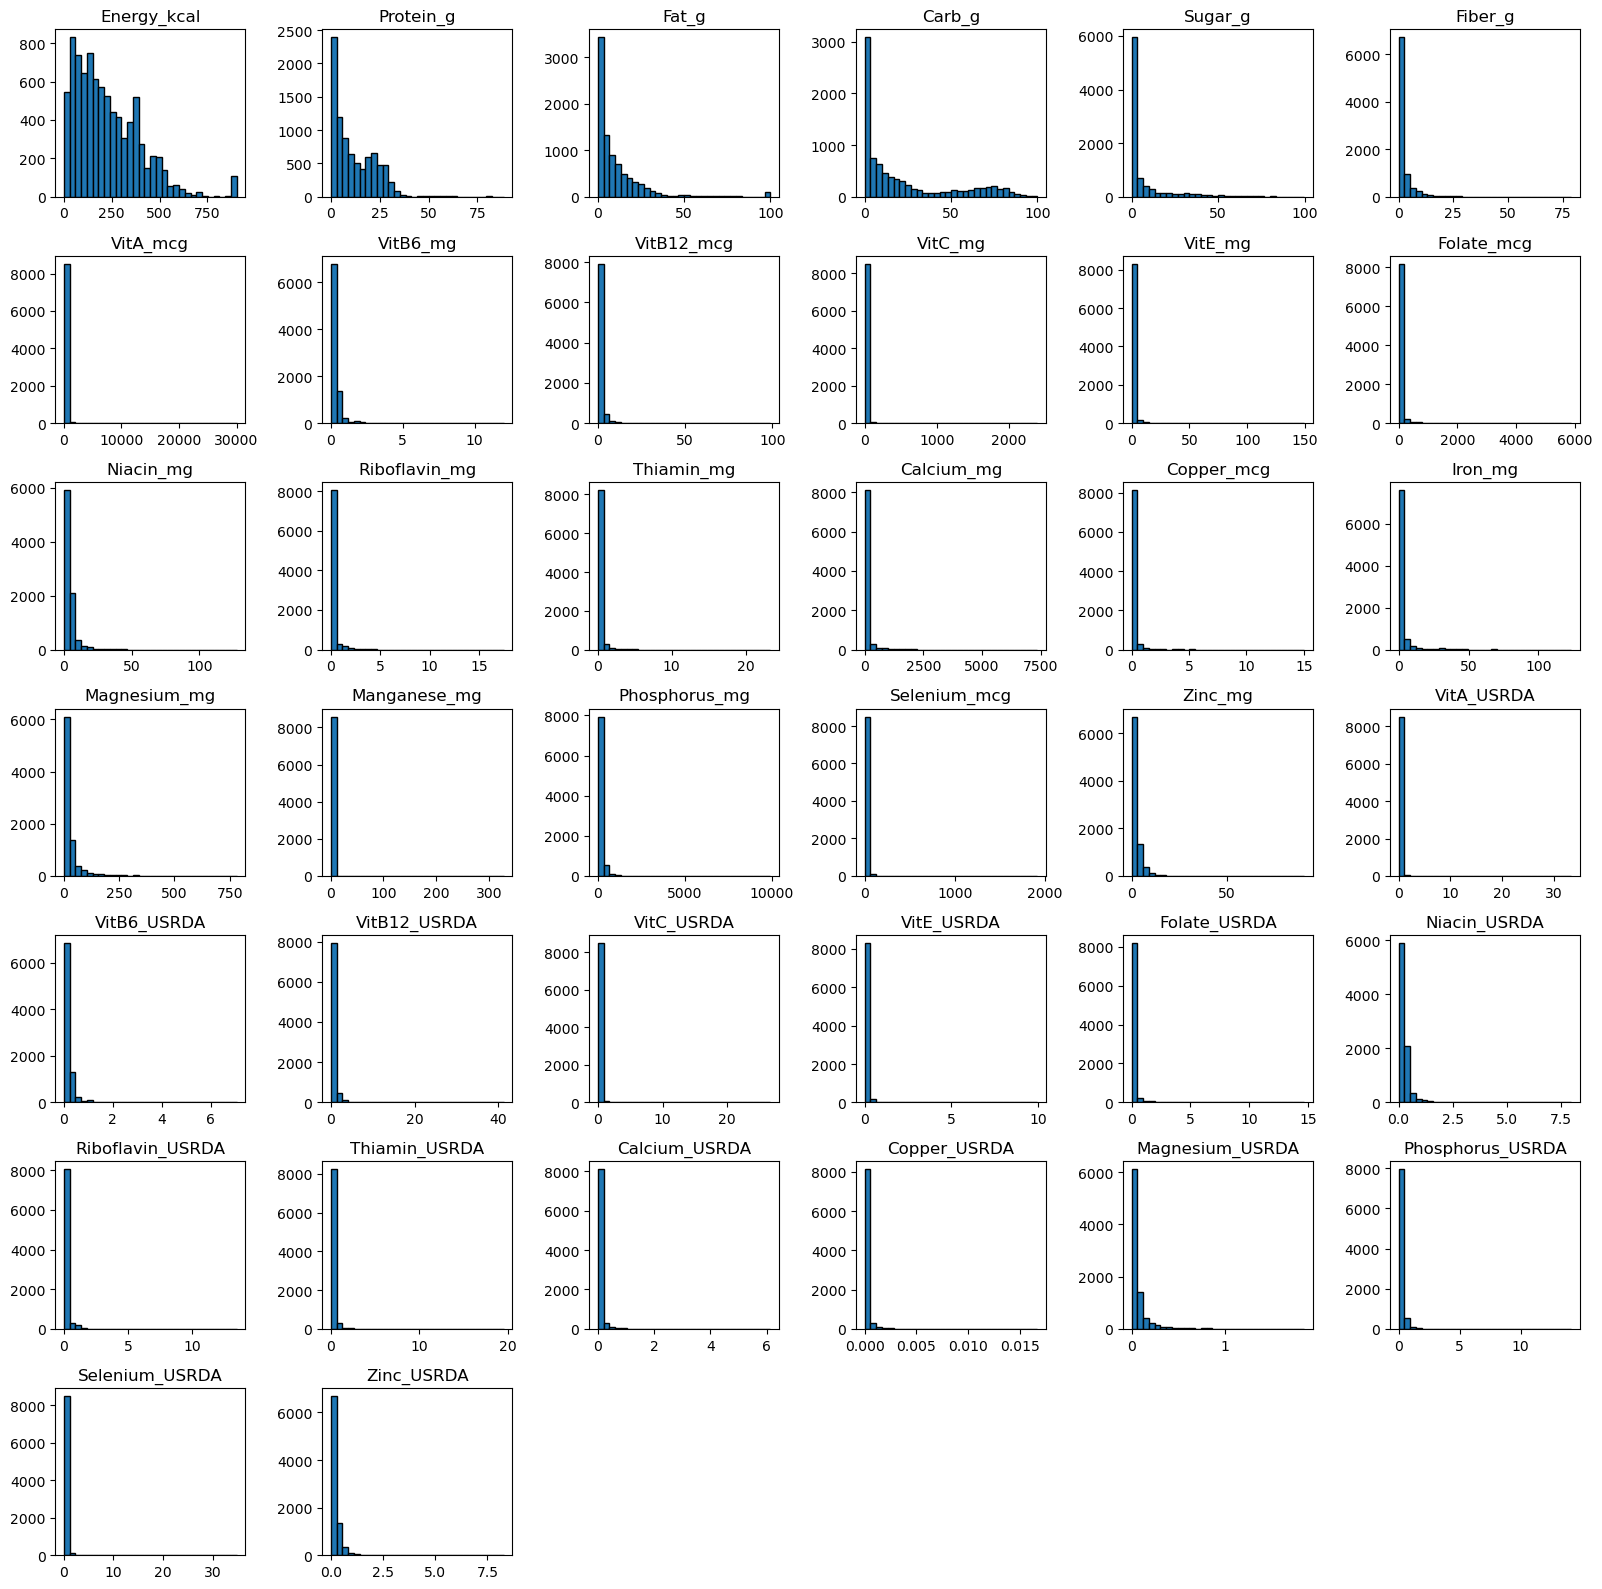

In [9]:
feature_cols = (
    df.select_dtypes(include=["number"])
      .drop(columns=["ID"], errors="ignore")
      .drop(columns=["target"], errors="ignore")
)

feature_cols.hist(
    figsize=(16, 16),
    bins=30,
    edgecolor="black",
    grid=False
)
plt.tight_layout()
plt.show()

                        mean         std  min           max       skew
Energy_kcal       226.438617  169.388910  0.0    902.000000   1.168243
Protein_g          11.523910   10.550590  0.0     88.320000   1.170610
Fat_g              10.647024   15.866353  0.0    100.000000   3.306166
Carb_g             21.819062   27.239000  0.0    100.000000   1.157211
Sugar_g             6.560253   13.602098  0.0     99.800000   2.953324
Fiber_g             2.023242    4.313670  0.0     79.000000   5.793241
VitA_mcg           93.968786  779.362205  0.0  30000.000000  24.090421
VitB6_mg            0.264369    0.478614  0.0     12.000000   7.557554
VitB12_mcg          1.225260    4.319183  0.0     98.890000  13.034297
VitC_mg             7.925377   57.582758  0.0   2400.000000  30.907462
VitE_mg             0.872329    3.849028  0.0    149.400000  13.849434
Folate_mcg         50.306104  186.560653  0.0   5881.000000  10.327038
Niacin_mg           3.411560    4.834572  0.0    127.500000   6.435334
Ribofl

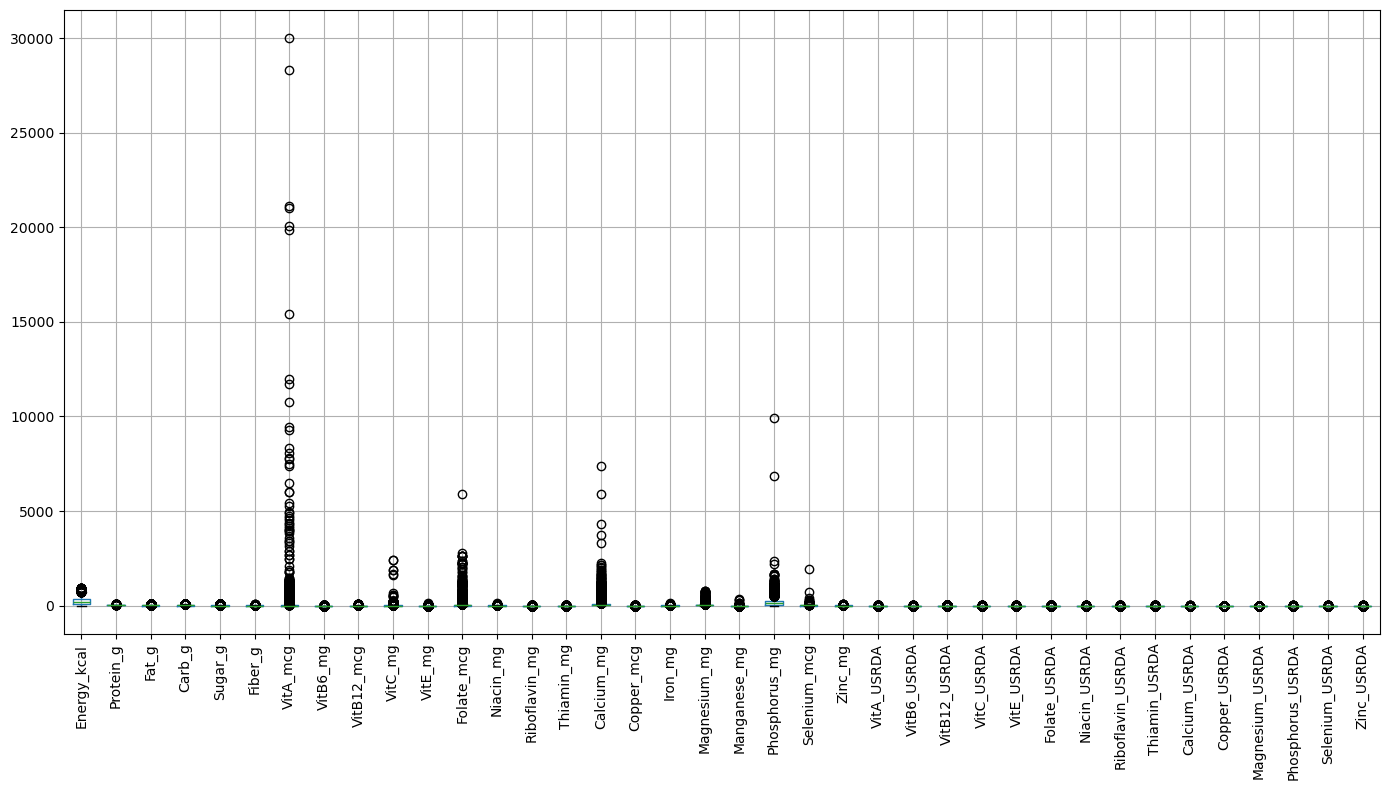

In [10]:
feature_cols = (
    df.select_dtypes(include=["number"])
      .drop(columns=["ID"], errors="ignore")
      .drop(columns=['target'], errors="ignore")
)

summary_stats = feature_cols.agg(["mean", "std", "min", "max"]).T
summary_stats["skew"] = feature_cols.skew(numeric_only=True)
print(summary_stats)

plt.figure(figsize=(14, 8))
feature_cols.boxplot(rot=90)
plt.tight_layout()
plt.show()


 ### ANOVA / Kruskal-Wallis 

In [11]:
from scipy import stats

feature_cols = (
    df.select_dtypes(include=["number"])
      .drop(columns=["ID"], errors="ignore")
)

anova_results = []
kruskal_results = []

for col in feature_cols.columns:
    groups = [group[col].dropna().values for _, group in df.groupby('target')]
    if not all(len(g) > 1 for g in groups):
        continue
    
    f_stat, f_p = stats.f_oneway(*groups)
    kw_stat, kw_p = stats.kruskal(*groups)
    anova_results.append((col, f_stat, f_p))
    kruskal_results.append((col, kw_stat, kw_p))

anova_df = pd.DataFrame(anova_results, columns=["feature", "f_stat", "p_value"]).sort_values("p_value")
kruskal_df = pd.DataFrame(kruskal_results, columns=["feature", "kw_stat", "p_value"]).sort_values("p_value")

print("ANOVA results (sorted by p-value):\n")
print(anova_df)

print("\nKruskal-Wallis results (sorted by p-value):\n")
print(kruskal_df)

ANOVA results (sorted by p-value):

             feature      f_stat        p_value
0        Energy_kcal  409.409758   0.000000e+00
34   Magnesium_USRDA  159.004501   0.000000e+00
31     Thiamin_USRDA   75.715291   0.000000e+00
29      Niacin_USRDA  151.378941   0.000000e+00
28      Folate_USRDA  129.373719   0.000000e+00
24       VitB6_USRDA  147.320704   0.000000e+00
22           Zinc_mg  140.782146   0.000000e+00
37        Zinc_USRDA  140.782146   0.000000e+00
18      Magnesium_mg  159.004501   0.000000e+00
17           Iron_mg  195.408347   0.000000e+00
14        Thiamin_mg   75.715291   0.000000e+00
12         Niacin_mg  151.378941   0.000000e+00
38            target         inf   0.000000e+00
3             Carb_g  875.940928   0.000000e+00
11        Folate_mcg  129.373719   0.000000e+00
5            Fiber_g  191.289948   0.000000e+00
1          Protein_g  582.609545   0.000000e+00
7           VitB6_mg  147.320704   0.000000e+00
2              Fat_g  368.038733   0.000000e+00
4   

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


### Feature Eng

In [12]:
df = pd.read_csv('nndb_flat.csv')

df["protein_density"] = df["Protein_g"] / df["Energy_kcal"]
df["fat_density"] = df["Fat_g"] / df["Energy_kcal"]
df["carb_density"] = df["Carb_g"] / df["Energy_kcal"]
df["sugar_density"] = df["Sugar_g"] / df["Energy_kcal"]
df["fiber_density"] = df["Fiber_g"] / df["Energy_kcal"]

print(df[["protein_density", "fat_density", "carb_density", "sugar_density", "fiber_density"]])


      protein_density  fat_density  carb_density  sugar_density  fiber_density
0            0.001185     0.113124      0.000084       0.000084            0.0
1            0.001185     0.113124      0.000084       0.000084            0.0
2            0.000320     0.113562      0.000000       0.000000            0.0
3            0.060623     0.081416      0.006629       0.001416            0.0
4            0.062642     0.080000      0.007520       0.001375            0.0
...               ...          ...           ...            ...            ...
8613         0.060656     0.082295      0.000000       0.000000            0.0
8614         0.185045     0.007568      0.048739       0.000000            0.0
8615         0.000000     0.000000      0.271896       0.272119            0.0
8616         0.178889     0.015556      0.022222       0.000000            0.0
8617         0.222472     0.005618      0.000000       0.000000            0.0

[8618 rows x 5 columns]


### Important Ratio

In [13]:


df["protein_carb_ratio"] = df["Protein_g"] / (df["Carb_g"] + 0.0000001)
df["protein_fat_ratio"] = df["Protein_g"] / (df["Fat_g"] + 0.0000001)
df["sugar_fiber_ratio"] = df["Sugar_g"] / (df["Fiber_g"] + 0.0000001)


print(df[["protein_carb_ratio", "protein_fat_ratio", "sugar_fiber_ratio"]])

      protein_carb_ratio  protein_fat_ratio  sugar_fiber_ratio
0           1.416664e+01           0.010480           600000.0
1           1.416664e+01           0.010480           600000.0
2           2.800000e+06           0.002815                0.0
3           9.145299e+00           0.744607          5000000.0
4           8.329749e+00           0.783019          5100000.0
...                  ...                ...                ...
8613        1.850000e+08           0.737052                0.0
8614        3.796673e+00          24.452378                0.0
8615        0.000000e+00           0.000000        732000000.0
8616        8.050000e+00          11.499999                0.0
8617        1.980000e+08          39.599992                0.0

[8618 rows x 3 columns]


### Total Macros

In [14]:
df["total_macros"] = df["Protein_g"] + df["Fat_g"] + df["Carb_g"] 

print(df[["total_macros"]])

      total_macros
0            82.02
1            82.02
2            99.76
3            52.48
4            55.71
...            ...
8613         43.60
8614         26.79
8615         73.14
8616         19.50
8617         20.30

[8618 rows x 1 columns]


### Calbirate mcg and mg
### convert mcg → mg

In [15]:


mcg_cols = [col for col in df.columns if col.endswith("_mcg")]

print('mcg Columns:',mcg_cols)

for col in mcg_cols:
    mg_col = col.replace("_mcg", "_mg")
    df[mg_col] = df[col] / 1000  # convert mcg → mg
    df.drop(columns=col, inplace=True)

df


mcg Columns: ['VitA_mcg', 'VitB12_mcg', 'Folate_mcg', 'Copper_mcg', 'Selenium_mcg']


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,fiber_density,protein_carb_ratio,protein_fat_ratio,sugar_fiber_ratio,total_macros,VitA_mg,VitB12_mg,Folate_mg,Copper_mg,Selenium_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0,1.416664e+01,0.010480,600000.0,82.02,0.684,0.00017,0.003,0.000000,0.0010
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0,1.416664e+01,0.010480,600000.0,82.02,0.684,0.00013,0.003,0.000016,0.0010
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0,2.800000e+06,0.002815,0.0,99.76,0.840,0.00001,0.000,0.000001,0.0000
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0,9.145299e+00,0.744607,5000000.0,52.48,0.198,0.00122,0.036,0.000040,0.0145
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0,8.329749e+00,0.783019,5100000.0,55.71,0.292,0.00126,0.020,0.000024,0.0145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0,1.850000e+08,0.737052,0.0,43.60,0.047,0.01200,0.015,0.000100,0.0734
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0,3.796673e+00,24.452378,0.0,26.79,0.002,0.00215,0.020,0.000033,0.0217
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0,0.000000e+00,0.000000,732000000.0,73.14,0.000,0.00000,0.000,0.000020,0.0007
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0,8.050000e+00,11.499999,0.0,19.50,0.030,0.00050,0.006,0.000400,0.0274


### Vit Score

In [16]:
vitamin_cols = [
    "VitA_USRDA",
    "VitB6_USRDA",
    "VitB12_USRDA",
    "VitC_USRDA",
    "VitE_USRDA",
    "Folate_USRDA",
    'Niacin_USRDA',
    'Riboflavin_USRDA',
    'Thiamin_USRDA'
]

df["vitamin_score_USDRA"] = df[vitamin_cols].sum(axis=1)

print(df[["vitamin_score_USDRA"]].head())


   vitamin_score_USDRA
0             1.027710
1             1.011044
2             1.129622
3             1.314160
4             1.244055


In [17]:
vitamin_cols = [
    "VitA_mg",
    "VitB6_mg",
    "VitE_mg",
    "VitB12_mg",
    "Folate_mg",
    "Niacin_mg",
    'Riboflavin_mg',
    'Thiamin_mg'
]

df["vitamin_score_mg"] = df[vitamin_cols].sum(axis=1)

print(df[["vitamin_score_mg"]].head())



   vitamin_score_mg
0           3.09117
1           3.09113
2           3.65001
3           2.07822
4           1.12126


In [18]:
df["mineral_score_mg"] = (
    df["Calcium_mg"]
    + df["Iron_mg"]
    + df["Magnesium_mg"]
    + df["Phosphorus_mg"]
    + df["Zinc_mg"]
    + df['Manganese_mg']
)

print(df[["mineral_score_mg"]].head())


   mineral_score_mg
0            50.110
1            49.214
2             7.010
3           940.979
4          1152.042


In [19]:

df["mineral_score_USRDA"] = (
    df["Calcium_USRDA"]
    + df["Magnesium_USRDA"]
    + df["Phosphorus_USRDA"]
    + df["Copper_USRDA"]+
    df['Selenium_USRDA']+
    df['Zinc_USRDA']
)

print(df[["mineral_score_USRDA"]].head())


   mineral_score_USRDA
0             0.085411
1             0.080364
2             0.008529
3             1.553118
4             1.763122


### Do embeddings on the description of the data

In [20]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

df["tokens"] = df["Descrip"].str.replace(",", "").str.lower().str.split()


sentences = df["tokens"].tolist()
w2v_model = Word2Vec(sentences, vector_size=1, seed=42) #. embedding model outputs the vec with dimension 1D.


def get_embedding(tokens):
    vecs = []
    for t in tokens:
        if t in w2v_model.wv:
            vecs.append(w2v_model.wv[t][0])
    if len(vecs) > 0:
        return sum(vecs)
    else:
        return np.zeros(1)[0]

df["Embedding_DESC"] = df["tokens"].apply(get_embedding)

scaler = StandardScaler()
df["Embedding_DESC"] = scaler.fit_transform(df[["Embedding_DESC"]])
df = df.drop("tokens", axis=1)


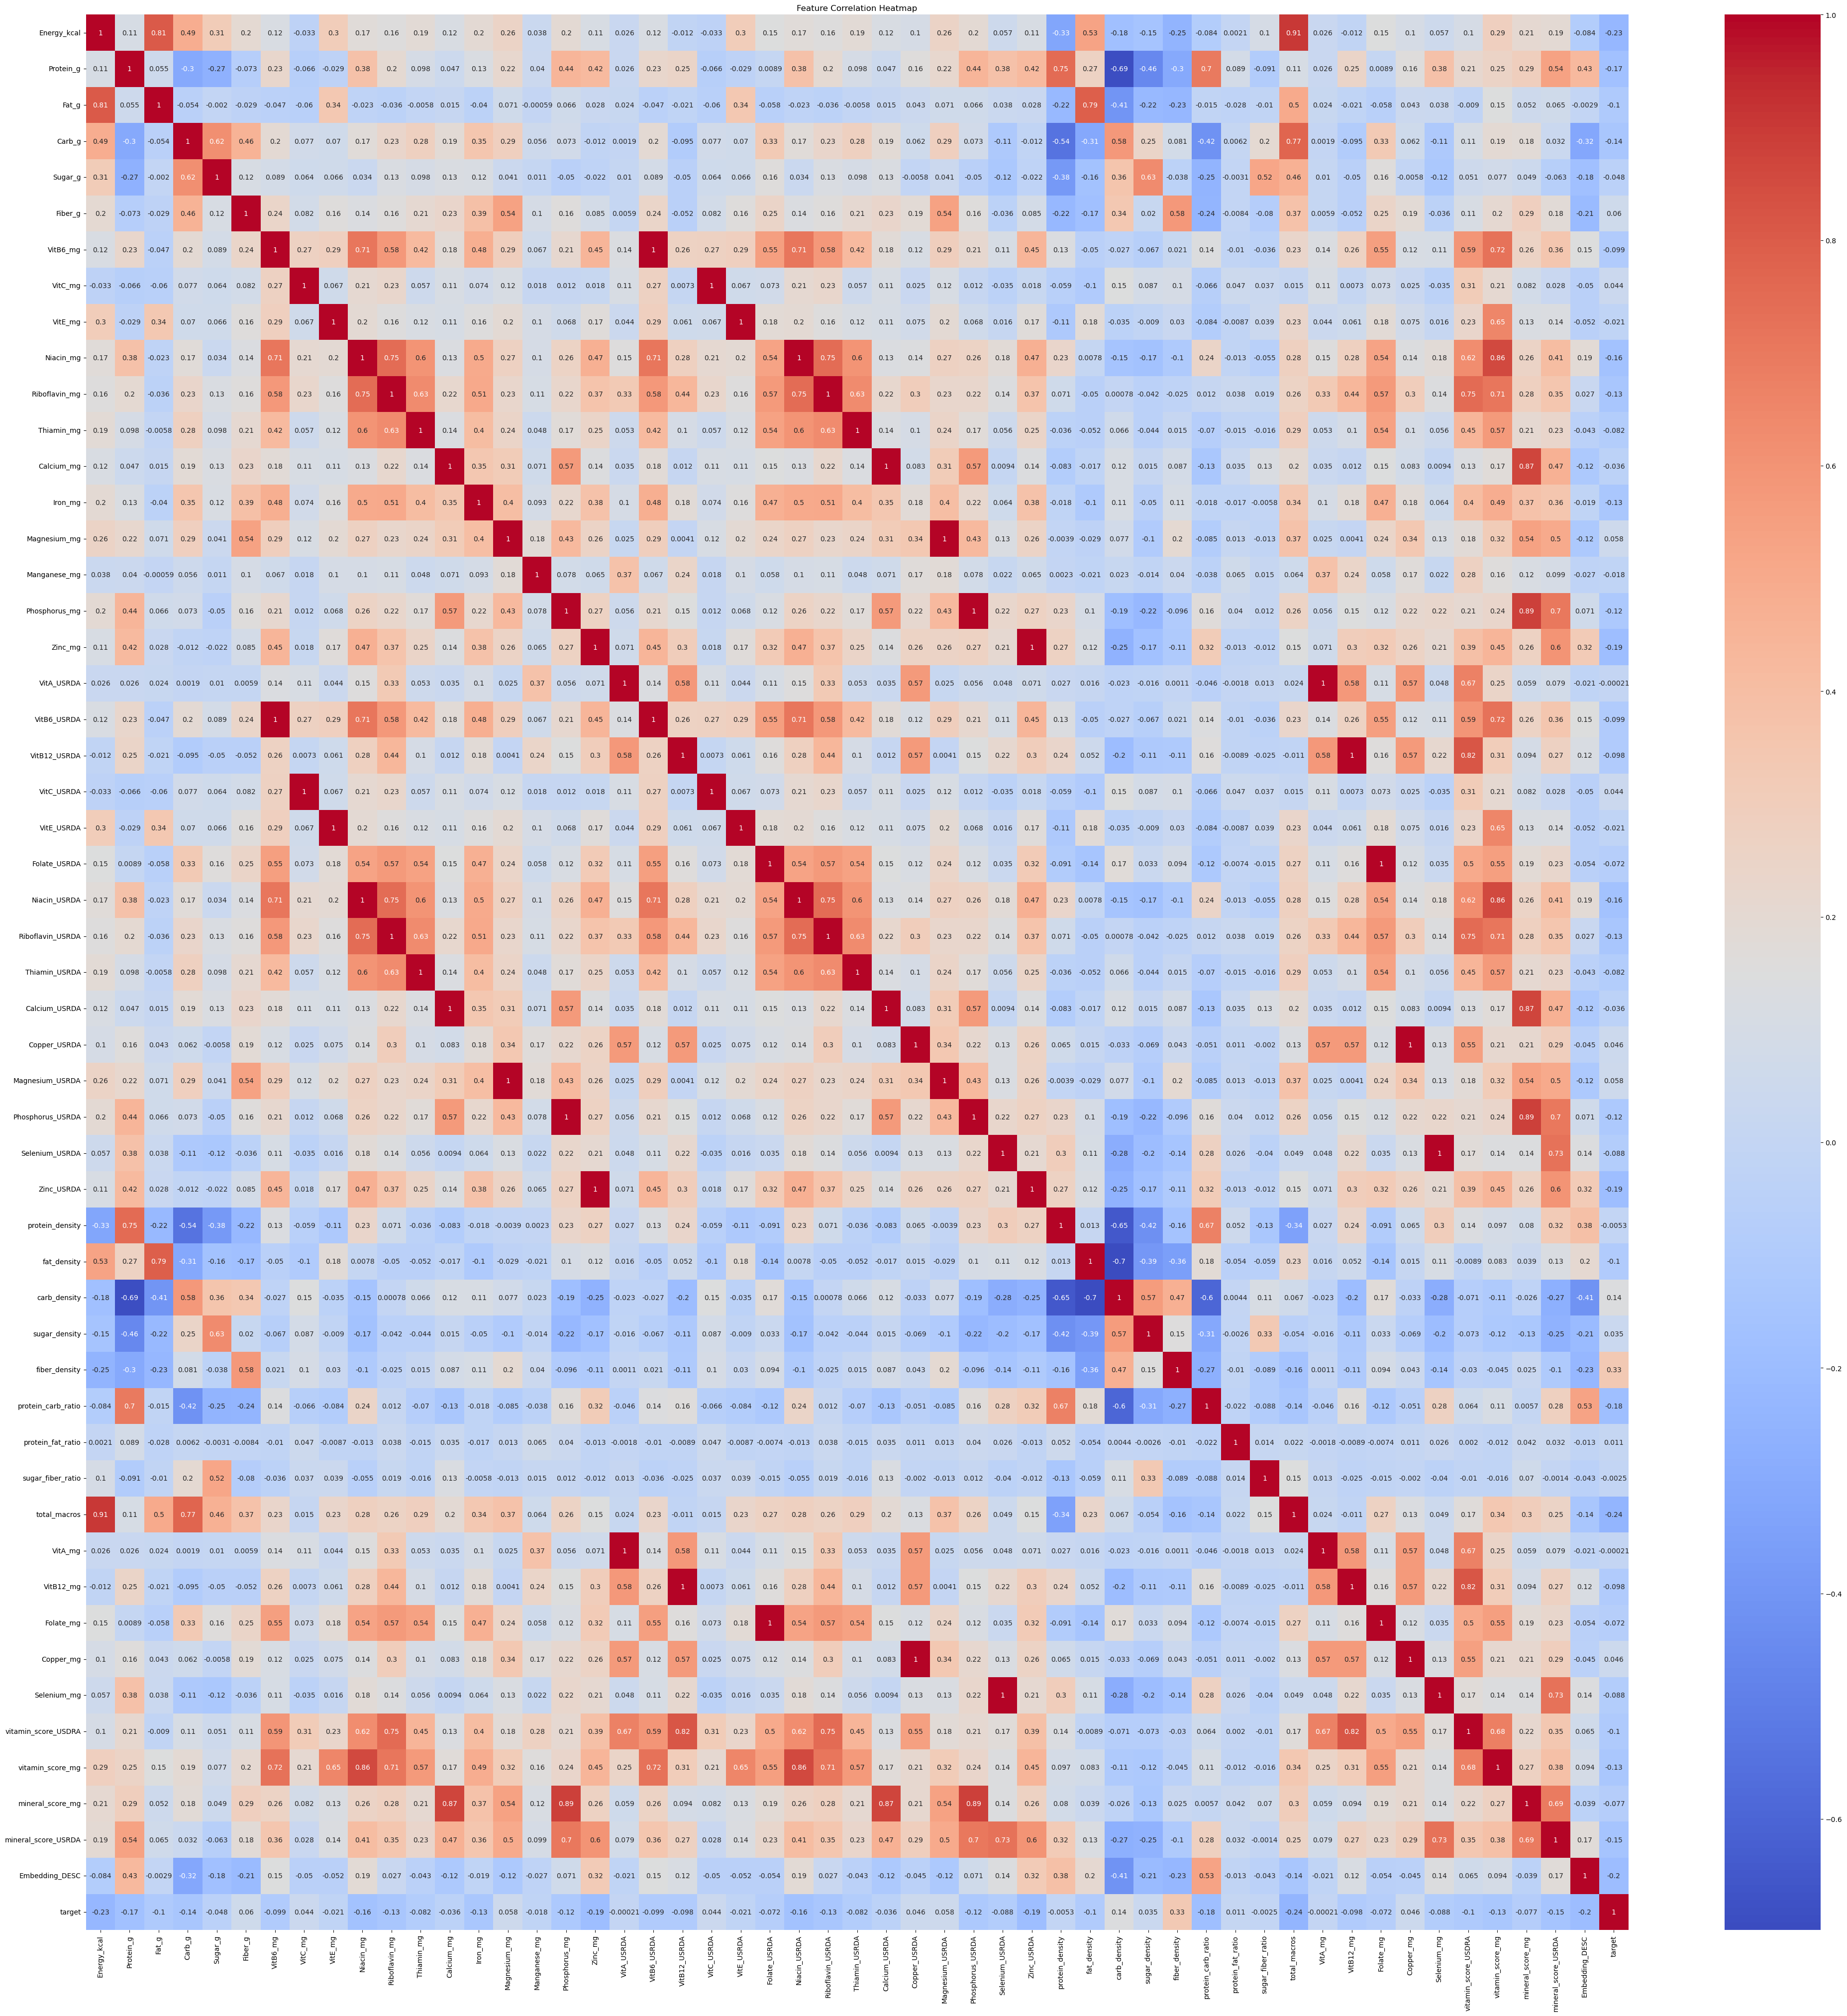

In [21]:
df['target'] = df['FoodGroup'].astype('category').cat.codes
features= df.columns.tolist()
X = features[7:]


plt.figure(figsize=(50,50))
sns.heatmap(df[X].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [22]:
df_final = df.copy()
df_final

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,VitB12_mg,Folate_mg,Copper_mg,Selenium_mg,vitamin_score_USDRA,vitamin_score_mg,mineral_score_mg,mineral_score_USRDA,Embedding_DESC,target
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.00017,0.003,0.000000,0.0010,1.027710,3.09117,50.110,0.085411,-1.220961,7
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.00013,0.003,0.000016,0.0010,1.011044,3.09113,49.214,0.080364,-0.772216,7
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.00001,0.000,0.000001,0.0000,1.129622,3.65001,7.010,0.008529,-1.109534,7
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.00122,0.036,0.000040,0.0145,1.314160,2.07822,940.979,1.553118,-1.312189,7
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.00126,0.020,0.000024,0.0145,1.244055,1.12126,1152.042,1.763122,-1.400425,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.01200,0.015,0.000100,0.0734,5.858636,6.37400,382.500,1.995371,-1.135340,10
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.00215,0.020,0.000033,0.0217,1.109649,1.24815,475.159,1.240491,-0.809748,10
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.00000,0.000,0.000020,0.0007,0.160737,0.29000,34.790,0.076094,-1.249627,23
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.00050,0.006,0.000400,0.0274,0.854612,6.69650,536.500,1.581678,-1.144416,10


In [23]:
features= df_final.columns.tolist()
X = features[7:]

print(features)
print(len(X))

['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitB6_mg', 'VitC_mg', 'VitE_mg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA', 'protein_density', 'fat_density', 'carb_density', 'sugar_density', 'fiber_density', 'protein_carb_ratio', 'protein_fat_ratio', 'sugar_fiber_ratio', 'total_macros', 'VitA_mg', 'VitB12_mg', 'Folate_mg', 'Copper_mg', 'Selenium_mg', 'vitamin_score_USDRA', 'vitamin_score_mg', 'mineral_score_mg', 'mineral_score_USRDA', 'Embedding_DESC', 'target']
53


In [24]:
import pandas as pd
import numpy as np

features= df_final.columns.tolist()
X = features[7:]

corr_df = df_final[X].corr()

Best_features = corr_df['target'].loc[corr_df['target'].abs().sort_values(ascending=False).index]



In [25]:
Best_features[:10].index.values

array(['target', 'fiber_density', 'total_macros', 'Energy_kcal',
       'Embedding_DESC', 'Zinc_USRDA', 'Zinc_mg', 'protein_carb_ratio',
       'Protein_g', 'Niacin_USRDA'], dtype=object)

In [26]:
Best_features[:20].index.values

array(['target', 'fiber_density', 'total_macros', 'Energy_kcal',
       'Embedding_DESC', 'Zinc_USRDA', 'Zinc_mg', 'protein_carb_ratio',
       'Protein_g', 'Niacin_USRDA', 'Niacin_mg', 'mineral_score_USRDA',
       'carb_density', 'Carb_g', 'Riboflavin_USRDA', 'Riboflavin_mg',
       'Iron_mg', 'vitamin_score_mg', 'Phosphorus_USRDA', 'Phosphorus_mg'],
      dtype=object)

In [27]:
Best_features[:30].index.values

array(['target', 'fiber_density', 'total_macros', 'Energy_kcal',
       'Embedding_DESC', 'Zinc_USRDA', 'Zinc_mg', 'protein_carb_ratio',
       'Protein_g', 'Niacin_USRDA', 'Niacin_mg', 'mineral_score_USRDA',
       'carb_density', 'Carb_g', 'Riboflavin_USRDA', 'Riboflavin_mg',
       'Iron_mg', 'vitamin_score_mg', 'Phosphorus_USRDA', 'Phosphorus_mg',
       'Fat_g', 'vitamin_score_USDRA', 'fat_density', 'VitB6_USRDA',
       'VitB6_mg', 'VitB12_USRDA', 'VitB12_mg', 'Selenium_mg',
       'Selenium_USRDA', 'Thiamin_mg'], dtype=object)

In [28]:
import pandas as pd

cols_to_drop = ["ShortDescrip", "Descrip", "CommonName", "MfgName", "ScientificName", "ID"]
df = df_final.drop(columns=cols_to_drop, errors="ignore")
df.to_csv('final_nndb.csv', index=False)
